In [1]:
import sympy as sp
sp.init_printing()
eps = sp.symbols('\\epsilon_1:7')
sig = sp.symbols('\\sigma_1:7')
eps,sig

In [2]:
n = 6
i = 1
def sMatrix(a,size=1,symmetric=False,symbargs={}) :
    " creates a square matrix "
    from sympy import symbols, Matrix
    mat = Matrix([[symbols('%s_{%i%i}'%(a,i+1,j+1),**symbargs) for j in range (size)] for i in range(size)])
    if symmetric :
        for i in range(0,size) :
            for j in range(i+1,size) :
                mat[j,i] = mat[i,j]
                #print(mat[i,j])
    return mat
C = sMatrix('C',6,True)
C

⎡C_{11}  C_{12}  C_{13}  C_{14}  C_{15}  C_{16}⎤
⎢                                              ⎥
⎢C_{12}  C_{22}  C_{23}  C_{24}  C_{25}  C_{26}⎥
⎢                                              ⎥
⎢C_{13}  C_{23}  C_{33}  C_{34}  C_{35}  C_{36}⎥
⎢                                              ⎥
⎢C_{14}  C_{24}  C_{34}  C_{44}  C_{45}  C_{46}⎥
⎢                                              ⎥
⎢C_{15}  C_{25}  C_{35}  C_{45}  C_{55}  C_{56}⎥
⎢                                              ⎥
⎣C_{16}  C_{26}  C_{36}  C_{46}  C_{56}  C_{66}⎦

In [3]:
# including temperature effects
dT = sp.symbols('\Delta{T}')
a = sp.Matrix(sp.symbols('\\alpha_1:7'))
a

⎡\alpha₁⎤
⎢       ⎥
⎢\alpha₂⎥
⎢       ⎥
⎢\alpha₃⎥
⎢       ⎥
⎢\alpha₄⎥
⎢       ⎥
⎢\alpha₅⎥
⎢       ⎥
⎣\alpha₆⎦

In [4]:
# isotropic material subsitutions
alpha = sp.symbols('\\alpha')
subs_ai = []
for i in range(6):
    if i < 3 :
        subs_ai.append( (a[i],alpha) )
    else :
        subs_ai.append( (a[i],0) )
E,nu = sp.symbols('E,\\nu')
subs_ai

In [5]:
subs_Ci = []
C1 = [(0,0),(1,1),(2,2)]
C2 = [(0,1),(0,2),(1,2)]
C3 = [(3,3),(4,4),(5,5)]
for i in range(6):
    for j in range(i,6):
        if (i,j) in C1:
            subs_Ci.append( (C[i,j],E/((1+nu)*(1-2*nu))*(1-nu) ) )
        elif (i,j) in C2:
            subs_Ci.append( (C[i,j],E/((1+nu)*(1-2*nu))*(nu) ) )
        elif (i,j) in C3:
            subs_Ci.append( (C[i,j],E/((1+nu) )) )
        else:
            subs_Ci.append( (C[i,j],0) )
C.subs(subs_Ci)

⎡     E⋅(-\nu + 1)               E⋅\nu                   E⋅\nu                
⎢──────────────────────  ──────────────────────  ──────────────────────     0 
⎢(-2⋅\nu + 1)⋅(\nu + 1)  (-2⋅\nu + 1)⋅(\nu + 1)  (-2⋅\nu + 1)⋅(\nu + 1)       
⎢                                                                             
⎢        E⋅\nu                E⋅(-\nu + 1)               E⋅\nu                
⎢──────────────────────  ──────────────────────  ──────────────────────     0 
⎢(-2⋅\nu + 1)⋅(\nu + 1)  (-2⋅\nu + 1)⋅(\nu + 1)  (-2⋅\nu + 1)⋅(\nu + 1)       
⎢                                                                             
⎢        E⋅\nu                   E⋅\nu                E⋅(-\nu + 1)            
⎢──────────────────────  ──────────────────────  ──────────────────────     0 
⎢(-2⋅\nu + 1)⋅(\nu + 1)  (-2⋅\nu + 1)⋅(\nu + 1)  (-2⋅\nu + 1)⋅(\nu + 1)       
⎢                                                                             
⎢                                                   

In [6]:
# numerical values used in the testcase
numvals = [(nu,0.25),(E,1e+9),(alpha,1e-6),(dT,1)]
numvals

In [7]:
# strain for all free expansion
eps_free = (a*dT).subs(subs_ai)
eps_free,eps_free.subs(numvals)

⎛⎡\Delta{T}⋅\alpha⎤, ⎡1.0e-6⎤⎞
⎜⎢                ⎥  ⎢      ⎥⎟
⎜⎢\Delta{T}⋅\alpha⎥  ⎢1.0e-6⎥⎟
⎜⎢                ⎥  ⎢      ⎥⎟
⎜⎢\Delta{T}⋅\alpha⎥  ⎢1.0e-6⎥⎟
⎜⎢                ⎥  ⎢      ⎥⎟
⎜⎢       0        ⎥  ⎢  0   ⎥⎟
⎜⎢                ⎥  ⎢      ⎥⎟
⎜⎢       0        ⎥  ⎢  0   ⎥⎟
⎜⎢                ⎥  ⎢      ⎥⎟
⎝⎣       0        ⎦  ⎣  0   ⎦⎠

In [8]:
# stress for all directions constraint
sig_const = C.subs(subs_Ci)*(a*dT).subs(subs_ai)
[exp.simplify() for exp in sig_const],sig_const.subs(numvals)

⎛⎡-E⋅\Delta{T}⋅\alpha   -E⋅\Delta{T}⋅\alpha   -E⋅\Delta{T}⋅\alpha          ⎤  
⎜⎢────────────────────, ────────────────────, ────────────────────, 0, 0, 0⎥, 
⎜⎣     2⋅\nu - 1             2⋅\nu - 1             2⋅\nu - 1               ⎦  
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎝                                                                             

        ⎞
⎡2000.0⎤⎟
⎢      ⎥⎟
⎢2000.0⎥⎟
⎢      ⎥⎟
⎢

In [9]:
# Thermal stress testcase 3: x-constraint
s = C*(sp.Matrix(eps)-a*dT)\
    .subs([(eps[i],0) for i in [0,3,4,5]])\
    .subs([(a[i],0) for i in [3,4,5]])
# set sig_22=sig_33=0 and compute eps_22,eps_33
e2e3 = sp.solve([s[1],s[2]],[eps[2],eps[1]])
s1 = s[0].subs([(key,e2e3[key]) for key in e2e3.keys()]).simplify()
e2 = e2e3[eps[1]]
sig1_mix = s1.subs(subs_ai).subs(subs_Ci).simplify()
eps2_mix = e2.subs(subs_ai).subs(subs_Ci).simplify()
sig1_mix,sig1_mix.subs(numvals),eps2_mix,eps2_mix.subs(numvals)

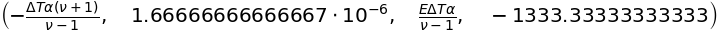

In [10]:
# uni-axisal strain
s = C*(sp.Matrix(eps)-a*dT)\
    .subs([(eps[i],0) for i in [1,2,3,4,5]])\
    .subs([(a[i],0) for i in [3,4,5]])
sig_ueps = s.subs(subs_Ci).subs(subs_ai)#.simplify()
ueps_e1 = sp.solve(sig_ueps[0],eps[0])[0]
ueps_s2 = sig_ueps[1].subs([(eps[0],ueps_e1)]).simplify()
ueps_e1,ueps_e1.subs(numvals),ueps_s2,ueps_s2.subs(numvals)